# Tarea 3, parte 1

[GAIA](http://sci.esa.int/gaia/) es una misión de la Agencia Espacial Europea, *ESA*, cuyo objetivo es trazar un mapa tridimensional de la Vía Láctea. A partir de esto, podría conocerse la composición, formación y evolución de la galaxia. Las mediciones de GAIA de posiciones y velocidades radiales no tienen precedentes y son lo suficientemente precisas como para describir la cinemática de alrededor de mil millones de estrellas de la Vía Láctea y del grupo local (cerca del 1% de la población total de estrellas en la galaxia).

Se espera que el catálogo final de GAIA se libere el 2020. A la fecha, se ha liberado un solo set de datos (Data Release 1, *DR1*), recién el 14 de septiembre del 2016, que contiene:

* Posiciones y magnitudes de GAIA (magnitudes G) de cerca de 1 100 millones de estrellas
* Posiciones, paralajes, y movimiento propio de unos 2 millones de estrellas, usando Tycho-Gaia Astrometric Solution [(**TGAS**)](https://arxiv.org/pdf/1412.8770v1.pdf), una adaptación del *Gaia's Astrometric Global Iterative Solution (AGIS)* que incorpora información del catálogo *Tycho* y usa observaciones de GAIA simuladas. 
* Curvas de luz y características de unas 3 000 estrellas variables
* Posiciones y magnitudes G de más de 2 000 quásars

Sin embargo, para explotar el potencial de los resultados de GAIA es necesario tener espectroscopía que complemente los datos. Según el trabajo de [Andrew R. Casey et al.](http://arxiv.org/pdf/1609.02914v1.pdf), el catálogo del **RAdial Velocity Experiment** (*RAVE*) posee el mayor número de coincidencias con GAIA (más de 200 000 estrellas), y ellos mismos presentan un catálogo, el ***RAVE-on***, construido a partir de datos re analizados de *RAVE*, usando *The Cannon* [(Ness et al. 2015, 2016)](https://arxiv.org/pdf/1501.07604v2.pdf).

* Para gigantes rojas, construyeron el modelo a partir de parámetros del espectrógrafo [*APOGEE*](https://www.sdss3.org/instruments/apogee_spectrograph.php) que coincidieran con *RAVE*
* Para la secuencia principal y sub-gigantes, se modeló a partir de parámetros de *K2/EPIC*

Con ello, se derivan valores para temperatura efectiva, log *g*, y abundancia química de O, Mg, Al, Si, Ca, Fe, Ni.

---
Cantidades exactas de objetos en los catálogos se obtienen a continuación:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gaia_tools.load as gload
import fitsio
import os
import datetime
from gaia_tools import xmatch
%matplotlib inline

raveon = gload.raveon()
tgas = gload.tgas()
print len(raveon), len(tgas)

520701 2057050


---
Se leen las cabeceras de distintos archivos en los catálogos y se realiza un cross-match entre TGAS y RAVE-on.

In [2]:
f1 = os.environ['GAIA_TOOLS_DATA']+'/Gaia/tgas_source/fits/TgasSource_000-000-000.fits'
f2 = os.environ['GAIA_TOOLS_DATA']+'/raveon/DR5/RAVE-on-v1.0.fits'
htgas = fitsio.read_header(f1, ext=1)
hrave = fitsio.read_header(f2, ext=1)
print hrave
print '\n'+60*'#'+'\n' +60*'#'+'\n'
print htgas


XTENSION= 'BINTABLE'           / binary table extension
BITPIX  =                    8 / array data type
NAXIS   =                    2 / number of array dimensions
NAXIS1  =                  344 / length of dimension 1
NAXIS2  =               520701 / length of dimension 2
PCOUNT  =                    0 / number of group parameters
GCOUNT  =                    1 / number of groups
TFIELDS =                   58 / number of table fields
TTYPE1  = 'RAVE_OBS_ID'
TFORM1  = '31A     '
TTYPE2  = 'RAVEID  '
TFORM2  = '16A     '
TTYPE3  = 'RA      '
TFORM3  = 'D       '
TTYPE4  = 'DEC     '
TFORM4  = 'D       '
TTYPE5  = 'HRV     '
TFORM5  = 'D       '
TTYPE6  = 'eHRV    '
TFORM6  = 'D       '
TTYPE7  = 'StdDev_HRV'
TFORM7  = 'D       '
TTYPE8  = 'MAD_HRV '
TFORM8  = 'D       '
TTYPE9  = 'CorrelationCoeff'
TFORM9  = 'D       '
TTYPE10 = 'PeakHeight'
TFORM10 = 'D       '
TTYPE11 = 'PeakWidth'
TFORM11 = 'D       '
TTYPE12 = 'CorrectionRV'
TFORM12 = 'D       '
TTYPE13 = 'SkyRV   '
TFORM13 = 'D 

In [3]:
m1,m2,sep= xmatch.xmatch(raveon,tgas,colRA2='ra',colDec2='dec',epoch2=2015.)
raveon = raveon[m1]
tgas = tgas[m2]

print len(raveon), len(tgas)
print raveon[999]
print '\n'+70*'#'+'\n' +70*'#'+'\n'
print tgas[999]

256787 256787
('20030610_1431m23_026', 'J142416.2-241230', 216.067583333333, -24.2083611111111, -7.955, 3.094, 0.843553831516796, 0.63696, 18.95, 0.865, 66.628, -1.461, -3.181, 5.699, 3.4, nan, 'BBC', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 51.05654836762387, 3.5581881538028077, False)

######################################################################
######################################################################

(-2147483648, '6732-1255-1', 1635378410781933568, 6272650923781858944, 1296245, 2015.0, 216.0673530601387, 0.3045112429003549, -24.20842079239196, 0.33850453018893, 3.369011489955374, 0.504729026343248, -44.935523471130075, 1.2527494083460817, -20.186004400021254, 0.4412574326811657, 0.49888384342193604, -0.6754025220870972, -0.8597753643989563, -0.3684074282646179, -0.8712553381919861, -0.7501554489135742, -0.84458

Pueden verse los datos que se incluyen, Hay **58** columnas de datos de los objetos de RAVE-on y **59** en los de TGAS. Entre ellas, las columnas

* RAVE-on:
    * 3, RA
    * 4, DEC
    * 5, Velocidad radial $v_r$
    * 38, Temperatura efectiva
    * 56, SNR
* TGAS:
    * 7, RA
    * 9, DEC
    * 11, paralaje
    * 13, Movimiento propio $\mu_\alpha$
    * 15, Movimiento propio $\mu_\delta$
    * 54, Magnitud G
    
 Con los datos del cross-match se realiza un diagrama $T_{eff}$ - $M_G$, para los datos que tengan definida una temperatura efectiva y paralaje, y donde la SNR sea mayor a 10.

In [4]:
# Se eligen solo si tienen Teff y p definidos y si SNR>10
# Tambien se guardan los valores para calcular v_x, v_y
nan = np.isnan(raveon[:]['TEFF']) + np.isnan(tgas[:]['phot_g_mean_mag']) + np.isnan(tgas[:]['parallax'])
raveon = raveon[~nan]
tgas = tgas[~nan]

mask = tgas[:]['parallax']/tgas[:]['parallax_error']>10
tgas = tgas[mask]
raveon = raveon[mask]

teff, mag = [], []
alpha, delta, p, mua, mud, vr = [], [], [], [], [], []

teff = raveon[:]['TEFF']
mag = tgas[:]['phot_g_mean_mag'] + 5 + 5*np.log10(tgas[:]['parallax']/1000)
alpha = tgas[:]['ra']
delta = tgas[:]['dec']
p = tgas[:]['parallax']
mua = tgas[:]['pmra']
mud = tgas[:]['pmdec']
vr = raveon[:]['HRV']

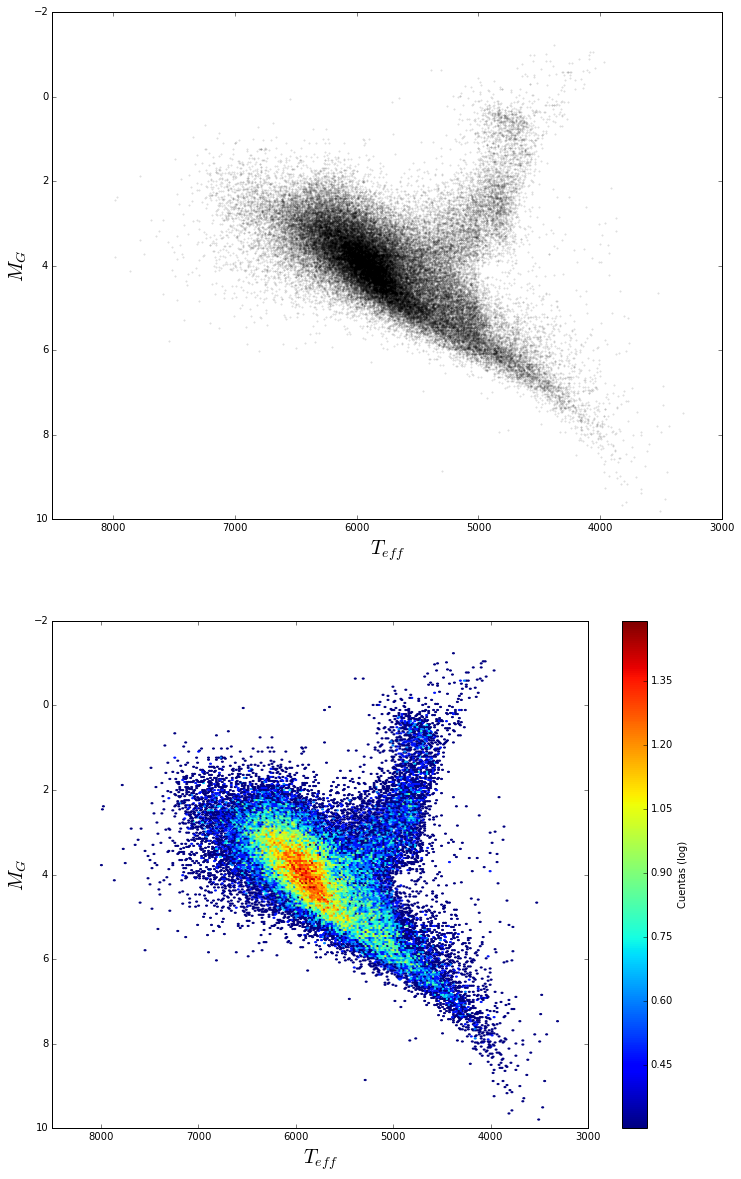

In [5]:
fig, ax = plt.subplots(2,1,figsize=(12,20))

for axis in ax:
    axis.set_xlabel('$T_{eff}$',fontsize=20)
    axis.set_ylabel('$M_G$',fontsize=20)
    axis.set_xlim(8500,3000)
    axis.set_ylim(10,-2)


ax[0].plot(teff,mag,'k.',alpha=.1,ms=3)
hess = ax[1].hexbin(teff,mag,bins='log',gridsize=400,mincnt=1)
leg = fig.colorbar(hess,ax=ax[1])
leg.set_label('Cuentas (log)')

plt.show()
plt.close()

Se aprecia secuencia proncipal y rama de las gigantes, aunque se ve que hay más de una población estelar.

---
A continuación se calculan las velocidades físicas en coordenadas galácticas rectangulares según la conversión descrita en la sección 2.1 del trabajo de [Jo Bovy et al. (2009)](https://arxiv.org/pdf/0905.2980.pdf)

$$v \equiv TA \begin{bmatrix}v_r \\ k/p \ \mu_\alpha \cos_\delta \\ k/p \ \mu_\delta\end{bmatrix} $$

In [6]:
theta = 123*np.pi/180
alphaN = 192.25*np.pi/180 # 12h 49'
deltaN = 27.4*np.pi/180
k = 4.74047

T1 = np.matrix([
    [np.cos(theta), np.sin(theta), 0],
    [np.sin(theta), (-1)*np.cos(theta), 0],
    [0, 0, 1]
    ]) 
T2 = np.matrix([
    [(-1)*np.sin(deltaN), 0, np.cos(deltaN)],
    [0, 1, 0],
    [np.cos(deltaN), 0, np.sin(deltaN)]
    ])
T3 = np.matrix([
    [np.cos(alphaN), np.sin(alphaN), 0],
    [(-1)*np.sin(alphaN), np.cos(alphaN), 0],
    [0, 0, 1]
    ])
T = T1*T2*T3

def v_r(alpha, delta, p, mua, mud, vr):
    alpha = alpha*np.pi/180
    delta = delta*np.pi/180
    
    A1 = np.matrix([
        [np.cos(alpha), (-1)*np.sin(alpha), 0],
        [np.sin(alpha), np.cos(alpha), 0],
        [0, 0, 1]
        ])
    A2 = np.matrix([
        [np.cos(delta), 0, (-1)*np.sin(delta)],
        [0, 1, 0],
        [np.sin(delta), 0, np.cos(delta)]
        ])
    A = A1*A2
    
    # Los mua, mud, p, deberian estar en as/year y no en mas/year
    # Pero como se dividen basta llamarlos de esta forma    
    v1 = np.matrix([
        [vr],
        [k/p *mua*np.cos(delta)],        
        [k/p *mud]
        ])
    v_x, v_y, v_z = T*A*v1
    vx.append(np.array(v_x)[0][0])
    vy.append(np.array(v_y)[0][0])
    return 0

vx, vy = [], []
for i in range(0, len(p)):
    v_r(alpha[i], delta[i], p[i], mua[i], mud[i], vr[i])

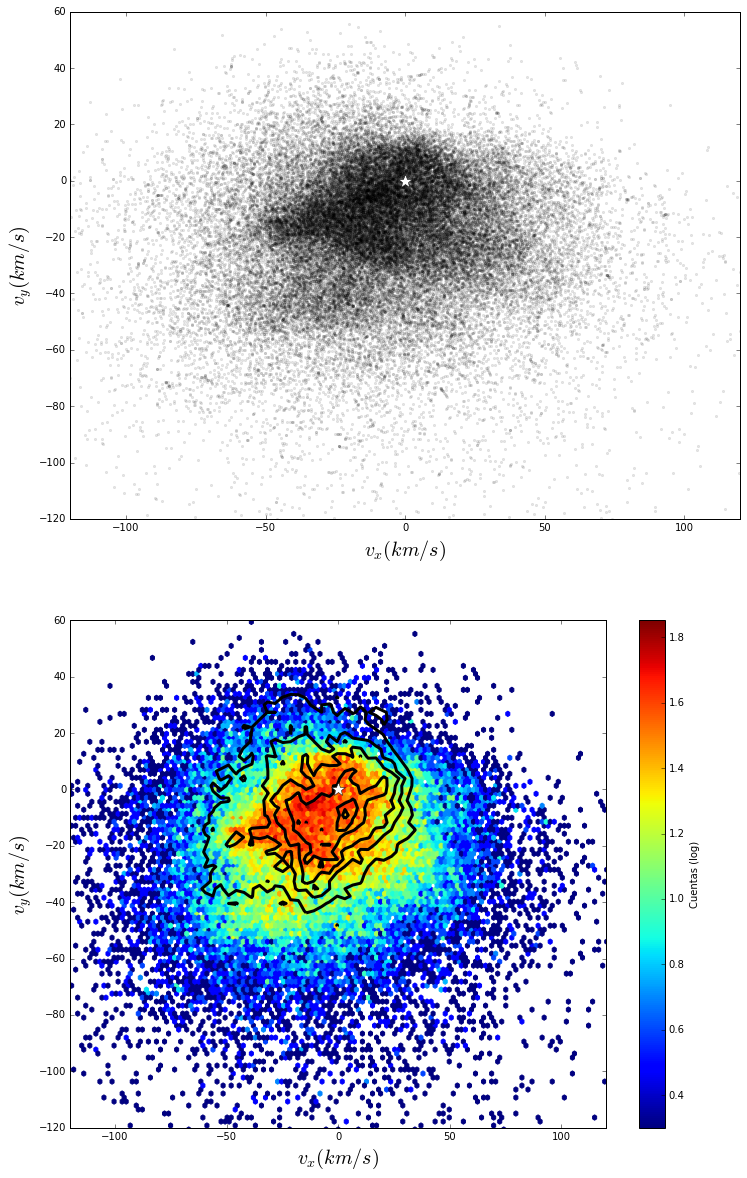

In [7]:
fig, ax = plt.subplots(2,1,figsize=(12,20))

ax[0].plot(vx,vy,'k.',alpha=.1,ms=5)

hess = ax[1].hexbin(vx,vy,bins='log',gridsize=650,mincnt=1)
counts,xbins,ybins,image = ax[1].hist2d(vx,vy,bins=70,alpha=0,range=[[-120,120],[-120,60]])
# lineas de contorno escaladas a ojo... quedan corridas pero sirven para visualizar
ax[1].contour(counts,linewidths=3,extent=[-150,90,-90,90],extend='both',colors='k',alpha=1)

cb = plt.colorbar(hess,ax=ax[1])
cb.set_label('Cuentas (log)')

for axis in ax:
    axis.set_xlabel('$v_x (km/s)$',fontsize=20)
    axis.set_ylabel('$v_y (km/s)$',fontsize=20)
    axis.plot(0, 0, 'w*', ms=15)
    axis.set_xlim(-120,120)
    axis.set_ylim(-120,60)

plt.show()
plt.close()

Se aprecia una gran estructura en el sentido en que los puntos no están dispersos al azar sino que están concentrados en un rango de velocidades. Además hay zonas de puntos más densas (fuera de la nube central) que podrían corresponder a cúmulos.

En el mismo trabajo de Jo Bovy se producen diagramas de velocidades a partir de datos de **Hipparcos**.
Hipparcos (*High Precision Parallax Collecting Satellite*) fue un satélite de la ESA que midió paralajes y movimientos propios de más de 2 500 millones de estrellas a menos de 150pc de la Tierra. Sus operaciones duraron desde el 1989 al 1993 y produjo el catálogo *Tycho*.

La figura 21 de Jo Bovy muestra:
<img src="bovyfig21.png">

Se ve que la distribución general de puntos es muy similar a lo obtenido con datos de GAIA